In [3]:
import geopandas as gpd
import pandas as pd
#import parquet

In [4]:
quadrangles = gpd.read_file("raw_data/7.5_Minute_Quadrangle_Boundaries-shp")
quadrangles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1962 non-null   int64   
 1   AREA        1962 non-null   float64 
 2   PERIMETER   1962 non-null   float64 
 3   QUADGRID_   1962 non-null   int64   
 4   QUADGRID_I  1962 non-null   int64   
 5   QUAD        1962 non-null   int64   
 6   NAME        1962 non-null   object  
 7   TILE_NAME   1962 non-null   object  
 8   LOCATION    1962 non-null   object  
 9   LATLONG_ID  1931 non-null   object  
 10  SHAPE_Leng  1962 non-null   float64 
 11  SHAPE_Area  1962 non-null   float64 
 12  geometry    1962 non-null   geometry
dtypes: float64(4), geometry(1), int64(4), object(4)
memory usage: 199.4+ KB


In [5]:
leases = gpd.read_file("raw_data/ASLD_-_State_Trust_Parcels/ASLD_-_State_Trust_Parcels.shp")
leases = leases.dissolve(by='lease_')
leases.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1767 entries, 0 to 124005
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    1767 non-null   geometry
 1   OBJECTID    1767 non-null   int64   
 2   landnum     1767 non-null   object  
 3   County      1767 non-null   object  
 4   parcel      1767 non-null   int64   
 5   fundtxt     1767 non-null   object  
 6   open_code   1767 non-null   int64   
 7   leased      1767 non-null   object  
 8   ke          1767 non-null   object  
 9   lse_code    1767 non-null   int64   
 10  lse_seq     1767 non-null   int64   
 11  effdate     1766 non-null   object  
 12  expdate     1766 non-null   object  
 13  perpetual   0 non-null      object  
 14  aus         1767 non-null   float64 
 15  rolodex_    1767 non-null   int64   
 16  full_name   1766 non-null   object  
 17  trs         1767 non-null   object  
 18  legal       1767 non-null   object  
 19  a

<Axes: >

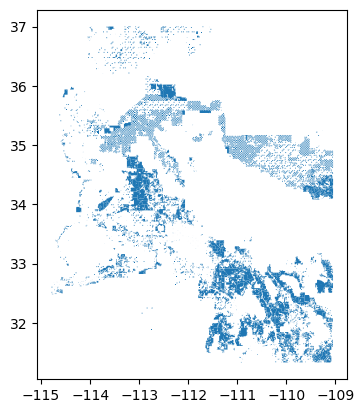

In [6]:
leases.plot()

933


<Axes: >

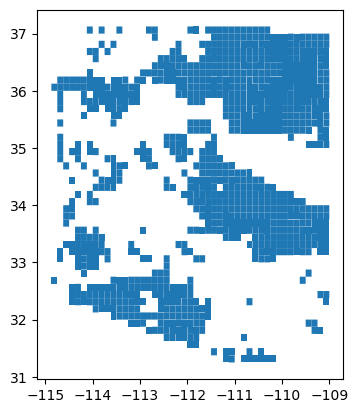

In [7]:
#First we find all quadrangles that overlap with a lease
outside_quadrangles = gpd.sjoin(left_df=quadrangles, right_df=leases, how='left', predicate="overlaps")
#Next we keep only the quadrangles that did overlap
# lease_quadrangles = outside_quadrangles[outside_quadrangles['landnum'].notna()]
# lease_quadrangles = outside_quadrangles[outside_quadrangles['landnum'].notna()]
lease_quadrangles = quadrangles
lease_quadrangles = lease_quadrangles[quadrangles.keys()]
#Next we keep only the quadrangles that did not overlap
outside_quadrangles = outside_quadrangles[outside_quadrangles['landnum'].isna()]
outside_quadrangles = outside_quadrangles[quadrangles.keys()]
print(len(outside_quadrangles.index))
outside_quadrangles.plot()

In [8]:
lease_quadrangles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1962 non-null   int64   
 1   AREA        1962 non-null   float64 
 2   PERIMETER   1962 non-null   float64 
 3   QUADGRID_   1962 non-null   int64   
 4   QUADGRID_I  1962 non-null   int64   
 5   QUAD        1962 non-null   int64   
 6   NAME        1962 non-null   object  
 7   TILE_NAME   1962 non-null   object  
 8   LOCATION    1962 non-null   object  
 9   LATLONG_ID  1931 non-null   object  
 10  SHAPE_Leng  1962 non-null   float64 
 11  SHAPE_Area  1962 non-null   float64 
 12  geometry    1962 non-null   geometry
dtypes: float64(4), geometry(1), int64(4), object(4)
memory usage: 199.4+ KB


In [9]:
outside_quadrangles = outside_quadrangles.to_crs(crs=3857)
lease_quadrangles = lease_quadrangles.to_crs(crs=3857)
leases = leases.to_crs(crs=3857)
outside_quadrangles["nearest_quadrangle"] = outside_quadrangles.geometry
lease_quadrangles["lease_quadrangle"] = lease_quadrangles.geometry

In [10]:
leases_with_nearest_quadrangle = gpd.sjoin_nearest(left_df=leases, right_df=outside_quadrangles, how='left')
leases_with_nearest_quadrangle = leases_with_nearest_quadrangle.drop(['index_right'], axis=1)
print(len(leases_with_nearest_quadrangle.index))
leases_with_nearest_quadrangle = gpd.sjoin_nearest(left_df=leases_with_nearest_quadrangle, right_df=lease_quadrangles, how='inner')
leases_with_nearest_quadrangle = leases_with_nearest_quadrangle.drop(['index_right'], axis=1)
leases_with_nearest_quadrangle.info()


1767
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4310 entries, 0 to 123815
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geometry            4310 non-null   geometry
 1   OBJECTID            4310 non-null   int64   
 2   landnum             4310 non-null   object  
 3   County              4310 non-null   object  
 4   parcel              4310 non-null   int64   
 5   fundtxt             4310 non-null   object  
 6   open_code           4310 non-null   int64   
 7   leased              4310 non-null   object  
 8   ke                  4310 non-null   object  
 9   lse_code            4310 non-null   int64   
 10  lse_seq             4310 non-null   int64   
 11  effdate             3771 non-null   object  
 12  expdate             3771 non-null   object  
 13  perpetual           0 non-null      object  
 14  aus                 4310 non-null   float64 
 15  rolodex_            4310 non

In [11]:
print(len(leases_with_nearest_quadrangle.index))

4310


<Axes: >

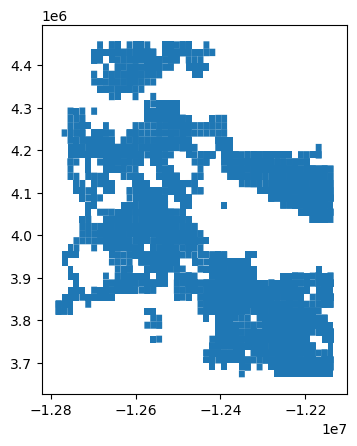

In [12]:
leases_with_nearest_quadrangle.lease_quadrangle.plot()

<Axes: >

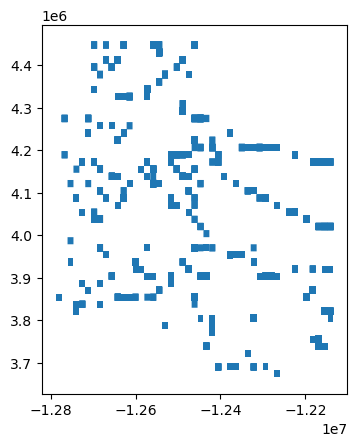

In [13]:
leases_with_nearest_quadrangle.nearest_quadrangle.plot()

<Axes: >

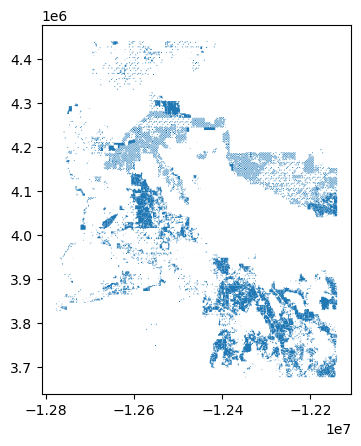

In [14]:
leases.plot()

In [15]:
# from shapely.ops import cascaded_union
import shapely
leases_with_nearest_quadrangle = leases_with_nearest_quadrangle.dissolve(by='lease_')
# leases_with_nearest_quadrangle = leases_with_nearest_quadrangle.dissolve(by='lease_', aggfunc={
#     "lease_quadrangle":lambda x: gpd.GeoSeries(shapely.union_all(x))
# })

In [16]:
leases_with_nearest_quadrangle.to_crs("EPSG:4326").to_parquet("our_data/leases_with_nearest_quadrangles.parquet")

In [17]:
leases_with_nearest_quadrangle

,geometry,OBJECTID,landnum,County,parcel,fundtxt,open_code,leased,ke,lse_code,...,QUADGRID__right,QUADGRID_I_right,QUAD_right,NAME_right,TILE_NAME_right,LOCATION_right,LATLONG_ID_right,SHAPE_Leng_right,SHAPE_Area_right,lease_quadrangle
lease_,,,,,,,,,,,,,,,,,,,,,
0,MULTIPOLYGON Z (((-12774176.903 3826457.124 0....,46266,1 8 2910 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,0,N,0,0,...,200,199,1155,LAST CHANCE CANYON,TRUMW,FORLN>NEWLIB>TRUMW,36113-D6,0.500004,0.015625,"POLYGON ((-12648764.616 4369637.858, -12648764..."
1,MULTIPOLYGON Z (((-12411247.993 3874545.039 0....,61994,4 6 835 11 91002,Pinal,1002,"LEGISLATIVE, EXEC, JUD BLDG",0,Y,5,0,...,1538,1536,2984,PICACHO RESERVOIR,CASAE,FORLN>NEWLIB>CASAE,32111-G4,0.500000,0.015625,"POLYGON ((-12398283.247 3878732.755, -12398283..."
4,MULTIPOLYGON Z (((-12264158.856 3756590.265 0....,48403,4 16 2232 2 301002,Cochise,1002,PERM COMMON SCHLS,0,Y,5,0,...,1793,1791,4090,DRAGOON,TUCE,FORLN>NEWLIB>TUCE,32110-A1,0.499993,0.015625,"POLYGON ((-12245213.697 3779740.364, -12245213..."
6,"POLYGON Z ((-12396862.144 3836535.526 0.000, -...",64274,4 10 913 11 461002,Pinal,1002,"ST CHRTBL, PENAL & REFORM INST",0,Y,1,0,...,1632,1630,2986,SAMANIEGO HILLS,CASAE,FORLN>NEWLIB>CASAE,32111-E4,0.500010,0.015626,"POLYGON ((-12398282.758 3845643.447, -12398282..."
7,MULTIPOLYGON Z (((-12150963.957 3753082.378 0....,47948,4 17 3123 2 91002,Cochise,1002,"LEGISLATIVE, EXEC, JUD BLDG",0,Y,5,0,...,1813,1811,4791,PORTAL,CHIRE,FORLN>NEWLIB>CHIRE,31109-H2,0.499996,0.015625,"POLYGON ((-12147808.163 3763322.183, -12147808..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123642,"POLYGON Z ((-12565684.270 3876941.550 0.000, -...",56799,3 6 633 7 311008,Maricopa,1008,PERM CMN SCHLS (INDMTY SELEC),0,Y,1,0,...,1514,1513,1784,SOUTH OF THEBA,GILAW,FORLN>NEWLIB>GILAW,32112-G8,0.500005,0.015625,"POLYGON ((-12565267.987 3878730.805, -12565267..."
123719,"POLYGON Z ((-12158942.155 4130990.035 0.000, -...",46413,1 16 2936 1 301002,Apache,1002,PERM COMMON SCHLS,0,Y,5,0,...,847,845,4769,VALLE BONITO,STJE,FORLN>NEWLIB>STJE,34109-F2,0.500007,0.015625,"POLYGON ((-12147811.235 4129963.870, -12147810..."
123815,"POLYGON Z ((-12567010.311 3899571.549 0.000, -...",55730,3 4 632 7 301000,Maricopa,1000,PERM COMMON SCHLS,0,Y,5,0,...,1425,1423,1782,CITRUS VALLEY WEST,PHXSW,FORLN>NEWLIB>PHXSW,33112-A8,0.500005,0.015625,"POLYGON ((-12565268.453 3911913.642, -12565268..."


<Axes: >

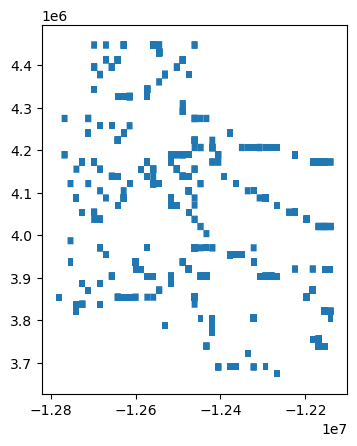

In [19]:
leases_with_nearest_quadrangle.nearest_quadrangle.plot()

<Axes: >

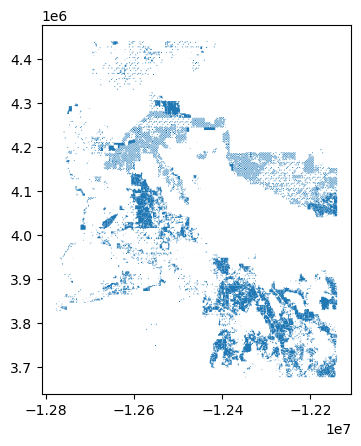

In [20]:
leases.plot()

<Axes: >

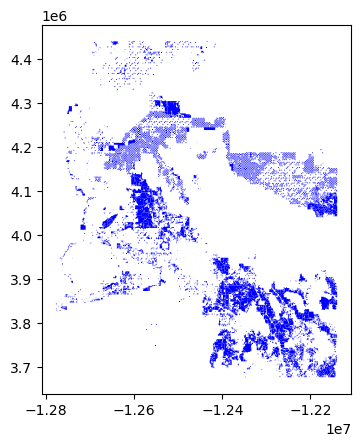

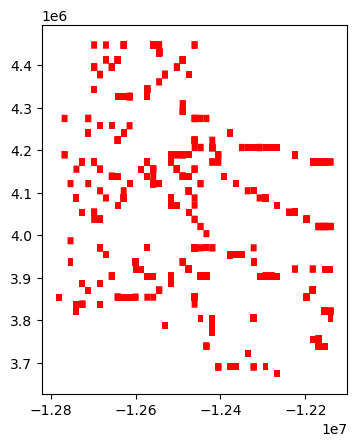

In [23]:
base = leases.plot(color='blue')
leases_with_nearest_quadrangle.nearest_quadrangle.plot(color="red")